In [2]:
#First let's install the statsbombpy library and import sb from it. Also we need to import pandas
!pip install statsbombpy
from statsbombpy import sb
import pandas as pd
import numpy as np 

In [3]:
#We're now definying our game that will be analysed, the final game of the world cup final is the below code. And we must import all the events that happened in that game 

final_copa_2022 = [3869685]

events = []
for n in final_copa_2022:
  match_events = sb.events(match_id = n)
  events.append(match_events)
  match_events_df = pd.concat(events)

c:\Users\victo\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [4]:
#importing some more important libraries

import requests as req
import statsbombpy.entities as ents
from statsbombpy.config import OPEN_DATA_PATHS


In [5]:
# Follow the statsbomb tutorial on how to get their data throught their API. This data will give us the 360 Data, will inform freeze by freeze 
# where were all the player and the ball in a certain time 

def get_response(path):
    response = req.get(path)
    response.raise_for_status()
    data = response.json()
    return data

def frames(match_id: int) -> dict:
    path = OPEN_DATA_PATHS["frames"].format(match_id=match_id)
    frames = get_response(path)
    frames = ents.frames(frames, match_id)
    return frames

In [6]:
#Putting the 360 data into a dataframe

final_copa_2022 = 3869685
match_360 = pd.DataFrame(frames(final_copa_2022))
match_360

,event_uuid,visible_area,freeze_frame,match_id
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
1,97b5dc82-547a-4f93-a632-a2a8daf5ac98,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
2,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
3,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
4,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ...",3869685
...,...,...,...,...
3678,97439112-dfb5-4bd5-9967-554095296096,"[74.8245066203564, 80.0, 65.5827051836776, 11....","[{'teammate': True, 'actor': True, 'keeper': F...",3869685
3679,50dcde1a-faa3-4eec-a0cd-3f09a7cf763a,"[71.7859219296227, 80.0, 72.1109742638867, 8.9...","[{'teammate': True, 'actor': True, 'keeper': F...",3869685
3680,54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91,"[6.10280272391214, 80.0, 37.1010455294984, 7.9...","[{'teammate': True, 'actor': True, 'keeper': F...",3869685
3681,bcc6d4ae-f71c-4566-bf2d-c12f910eb526,"[6.0830318986702, 80.0, 35.2414826693926, 9.61...","[{'teammate': True, 'actor': True, 'keeper': F...",3869685


In [7]:
match_events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [8]:
#Merging the events of the game with the 360 data

df = pd.merge(left = match_events_df, right = match_360 , left_on = 'id', right_on = 'event_uuid', how = 'left')

In [9]:
df.columns
df['type'].unique()



array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [10]:
#For our analysis, we're going to look deeper on how messi carries were in this particularly match

Messi_id = int(df[df['player'] == 'Lionel Andrés Messi Cuccittini']['player_id'].unique())

messi_carry = df[(df['player_id'] == Messi_id) & (df['type'] == 'Carry')]

# getting the start location of Messi whenever he tried to carry the ball. 

x_loc=[]
y_loc =[]
for row in messi_carry['location']:
    x_loc.append(row[0])
    y_loc.append(row[1])

messi_carry['x_loc_start'] = x_loc
messi_carry['y_loc_start'] = y_loc


#Now we are getting the end location of his carries. 

messi_carry['carry_end_location']

x_loc_end =[]
y_loc_end = [] 

for row in messi_carry['carry_end_location']:
    x_loc_end.append(row[0])
    y_loc_end.append(row[1])

messi_carry['x_loc_end'] = x_loc_end
messi_carry['y_loc_end'] = y_loc_end


C:\Users\victo\AppData\Local\Temp\ipykernel_17496\2443840705.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_carry['x_loc_start'] = x_loc
C:\Users\victo\AppData\Local\Temp\ipykernel_17496\2443840705.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_carry['y_loc_start'] = y_loc
C:\Users\victo\AppData\Local\Temp\ipykernel_17496\2443840705.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [11]:
#Calculating the distance Messi covered with the ball in his possession
distance_x = []
distance_y = []

for x_start,x_end in zip(messi_carry['x_loc_start'],messi_carry['x_loc_end']):
    distance = abs(round((abs(x_end) - abs(x_start)),3))
    distance_x.append(distance)

messi_carry['distance_x'] = distance_x

for y_start,y_end in zip(messi_carry['y_loc_start'],messi_carry['y_loc_end']):
    distance = abs(round((abs(y_end) - abs(y_start)),3))
    distance_y.append(distance)

messi_carry['distance_y'] =  distance_y

messi_carry['distance'] = np.sqrt(messi_carry['distance_y']**2 + messi_carry['distance_x']**2)

C:\Users\victo\AppData\Local\Temp\ipykernel_17496\4029760916.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_carry['distance_x'] = distance_x
C:\Users\victo\AppData\Local\Temp\ipykernel_17496\4029760916.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi_carry['distance_y'] =  distance_y
C:\Users\victo\AppData\Local\Temp\ipykernel_17496\4029760916.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [12]:
#Installing the mplsoccer library in order to get the pitch draw and better visualization to help our analysis

!pip install mplsoccer
from mplsoccer import Pitch
from PIL import Image




In [13]:

messi_carry_over10m = messi_carry.loc[messi_carry['distance']>=10]
n_messi_carry_over10m = messi_carry_over10m.index.value_counts().sum()
n_messi_carry = messi_carry.index.value_counts().sum()
percent = round((n_messi_carry_over10m/n_messi_carry)*100,2)

# load the image
imagem = Image.open('messi_champion.jpg')











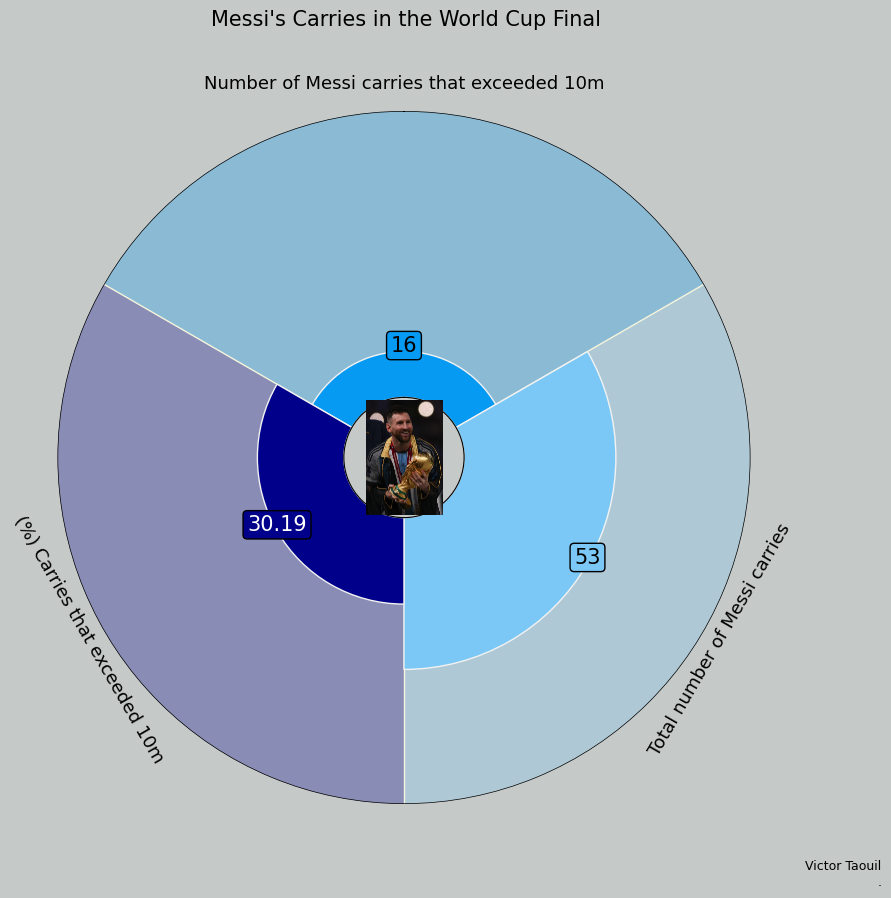

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

# parameter list
params = [
    'Number of Messi carries that exceeded 10m',
    'Total number of Messi carries',
    "(%) Carries that exceeded 10m"
]


values = [
    n_messi_carry_over10m ,
    n_messi_carry,
    percent
]
      # color for the slices and text
slice_colors = ['#069AF3'] + ['#7BC8F6'] + ['#00008B']
text_colors = ["#000000"] * 2 + ['#FFFFFF']

                # instantiate PyPizza class
baker = PyPizza(
                params=params,                  # list of parameters
                background_color="#C5C9C7",     # background color
                straight_line_color="#F5F5DC",  # color for straight lines
                straight_line_lw=1,             # linewidth for straight lines
                last_circle_lw=1,               # linewidth of last circle
                other_circle_lw=0,              # linewidth for other circles
                inner_circle_size=21            # size of inner circle
                )

                # plot pizza
fig, ax = baker.make_pizza(
                values,                          # list of values
                figsize=(10, 9),                # adjust figsize according to your need
                color_blank_space='same',        # use same color to fill blank space
                slice_colors=slice_colors,       # color for individual slices
                value_colors=text_colors,        # color for the value-text
                value_bck_colors=slice_colors,   # color for the blank spaces
                blank_alpha=0.3,                 # alpha for blank-space colors
                kwargs_slices=dict(
                        edgecolor="#F2F2F2", zorder=2.5, linewidth=1
                ),                               # values to be used when plotting slices
                kwargs_params=dict(
                        color="#000000", fontsize=13,
                ),                               # values to be used when adding parameter
                kwargs_values=dict(
                        color="#000000", fontsize=15,
                        bbox=dict(
                        edgecolor="#000000", facecolor="cornflowerblue",
                        boxstyle="round,pad=0.2", lw=1
                        )
                )                                # values to be used when adding parameter-values
                )

                # add title
fig.text(
                0.515, 0.975, "Messi's Carries in the World Cup Final", size=15,
                ha="center",  color="#000000"
                )

                # add subtitle
fig.text(
                0.510, 0.935,
                "",
                size=13,
                ha="center",  color="#000000"
                )

                # add credits
CREDIT_1 = "Victor Taouil"
CREDIT_2 = "."

fig.text(
                0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
                color="#000000",
                ha="right"
                )


                # add image
ax_image = add_image(
                imagem, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
                )   # these values might differ when you are plotting

plt.show()




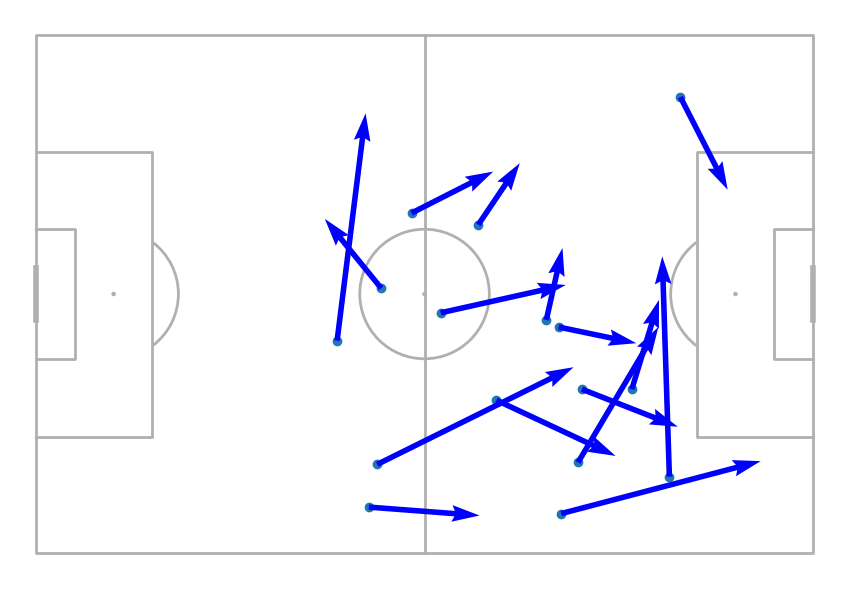

In [15]:
#Plotting the pitch with 
p = Pitch(pitch_type= 'statsbomb')
fig, ax = p.draw(figsize=(12,6))


#Plotting Messi's location and only those carries that exceeded 10m

p.scatter(x = messi_carry['x_loc_start'][messi_carry_over10m.index], y = messi_carry['y_loc_start'][messi_carry_over10m.index], ax=ax)


p.arrows(xstart = messi_carry['x_loc_start'][messi_carry_over10m.index], ystart=messi_carry['y_loc_start'][messi_carry_over10m.index], xend= messi_carry['x_loc_end'][messi_carry_over10m.index], yend= messi_carry['y_loc_end'][messi_carry_over10m.index], ax=ax, color = 'blue')
